In [1]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


In [32]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

%matplotlib inline

## Load input

In [3]:
joan_mouse = pd.read_excel('/cellar/users/mdow/Projects/HCC/RNA_analysis/mouse_mutations_RNAseq_jfb.xlsx')

joan_human = pd.read_excel('/cellar/users/mdow/Projects/HCC/RNA_analysis/human_mutations_RNAseq_jfb.xlsx')

In [4]:
'''
Translate DNA name to RNA name and then sort 
'''
sName_match = pd.read_csv('/cellar/users/mdow/Projects/HCC/SampleName_RNA_DNA.txt',sep='\t')
rnaToModel_dict = sName_match.set_index(['RNA_sName'])['Model'].to_dict()
dnaToModel_dict = sName_match.set_index(['DNA_sName'])['Model'].to_dict()
dnaToRna_dict = sName_match.set_index(['DNA_sName'])['RNA_sName'].to_dict()


In [5]:
#zDf = pd.read_pickle('/cellar/users/mdow/Projects/HCC/RNA_analysis/iCluster/iCluster_corr_mouse.pkl')
zDf = pd.read_pickle('/cellar/users/mdow/Projects/HCC/RNA_analysis/iCluster/iCluster_corr_test.pkl')

zDf.head()

patient_id               a114      a4xi      a3m9      a3ma      a10x  \
strain sample                                                           
TAK1   AT136_T1_S23 -1.007228 -0.362094 -0.608706 -0.898519 -0.554604   
       AT66_T1_S19  -1.230129 -0.927296 -0.777412 -0.848059 -1.037414   
       AT66_T2_S20   0.857451  1.089440  0.463931  0.285337  0.802871   
       AT81_S22     -0.884927  0.834877 -1.049590 -1.262178  1.225954   
       AT136_T3_S25  0.414481  1.129914  0.048498 -0.119869  1.308757   

patient_id               a112      a113      a10w      a3mc      a3ch  \
strain sample                                                           
TAK1   AT136_T1_S23 -1.093737 -1.586821 -1.234670 -0.664343 -0.324669   
       AT66_T1_S19  -0.918404 -1.458028 -0.908021 -1.780136 -0.201664   
       AT66_T2_S20   0.349758  0.724061  0.035367  1.136539  1.228582   
       AT81_S22     -1.308278 -0.320251 -0.732483  0.195127  1.178148   
       AT136_T3_S25 -0.013561  0.163663 -0.035976  0.878947  0.991184   

patient_id             ...         a7mc      a7sf      a3a5      a2l6  \
strain sample          ...                                              
TAK1   AT136_T1_S23    ...    -2.526270 -1.205261 -0.563179 -1.056777   
       AT66_T1_S19     ...    -0.635300 -1.402914 -0.629323 -0.629009   
       AT66_T2_S20     ...    -1.186731  0.121329  0.481892 -0.031419   
       AT81_S22        ...     0.016908  0.679251  1.384637  1.209667   
       AT136_T3_S25    ...    -0.328303  0.459509  1.237712  1.069895   

patient_id               a25z      a2kc      a10u      a217      a25s  \
strain sample                                                           
TAK1   AT136_T1_S23 -0.624128 -2.086692 -3.307918 -1.750979 -1.803798   
       AT66_T1_S19  -1.147087 -1.578442 -2.611991 -1.266847 -2.101058   
       AT66_T2_S20   0.184201 -0.242675 -1.153875 -0.480924  0.035743   
       AT81_S22      1.163380  0.879980 -0.045041  0.313977  0.599057   
       AT136_T3_S25  1.314242  0.842206 -0.264965  0.688039  0.953315   

patient_id               a7il  
strain sample                  
TAK1   AT136_T1_S23 -1.277038  
       AT66_T1_S19  -1.156342  
       AT66_T2_S20  -0.678663  
       AT81_S22      1.391471  
       AT136_T3_S25  0.692245  

[5 rows x 183 columns]

In [6]:
corr_sum_S = zDf.sum(axis=1).reset_index(name='Corr_sum')

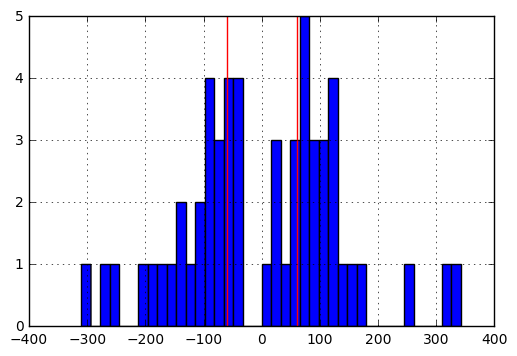

In [9]:
corr_sum_S.Corr_sum.hist(bins=40)
plt.axvline(x=60,color='r')
plt.axvline(x=-60,color='r')

In [10]:
corr_sum_S.Corr_sum.median(), corr_sum_S.Corr_sum.mean()

(17.224000202840617, -4.0602442043434294e-15)

In [11]:
# mid: 62, 20, 32,38?

In [12]:
corr_sum_S[corr_sum_S.strain == 'DEN'].Corr_sum.median(), corr_sum_S[corr_sum_S.strain == 'DEN'].Corr_sum.mean()

(18.351387676983045, 1.1557693261776554)

In [71]:
corr_sum_S[corr_sum_S.strain == 'MUP'].sort_values(['Corr_sum'])

,strain,sample,Corr_sum,condition
28,MUP,HFD10_S35,-193.730446,Low
29,MUP,J406_T4_S32,-173.000812,Low
33,MUP,J406_T2_S30,-132.079025,Low
34,MUP,J341_T2_S29,-99.384260,Low
31,MUP,HFD13_S36,-90.823925,Low
32,MUP,J341_T1_S28,-67.316686,Low
30,MUP,HFD1_T2_S34,-51.462763,Low
36,MUP,J406_T3_S31,20.872859,High
35,MUP,HFD1_T1_S33,103.400351,High


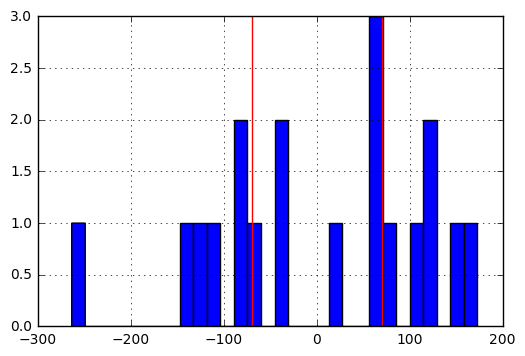

In [15]:
corr_sum_S[corr_sum_S.strain == 'DEN'].Corr_sum.hist(bins=30)
plt.axvline(x=70,color='r')
plt.axvline(x=-70,color='r')

#.sort_values(['Corr_sum'])#

In [89]:
sample_N = {'TAK1':9,'MUP':9,'STAM':19,'DEN':19}

TAK1
18.1158031008 57.3993095675 171.534694952
121.036620072 -84.8050138705
STAM
26.2380453101 46.5391202332 146.129915349
113.915994519 -61.4399038992
MUP
-75.9471895552 -90.8239246193 93.158019169
-20.0523780538 -131.842001057
DEN
1.15576932618 18.351387677 116.999584285
71.3555198973 -69.0439812449


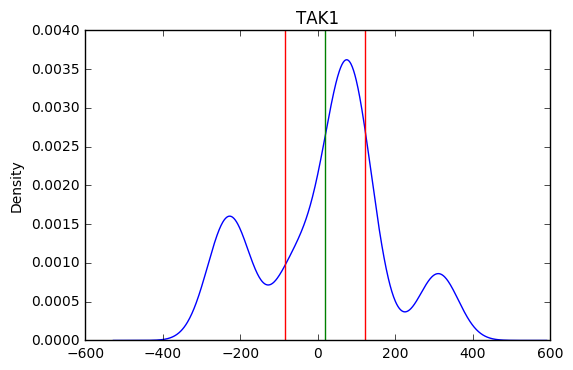

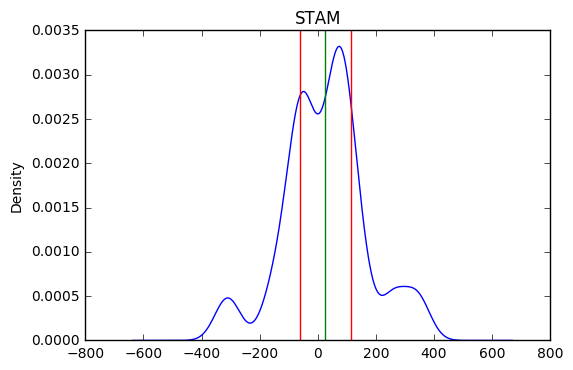

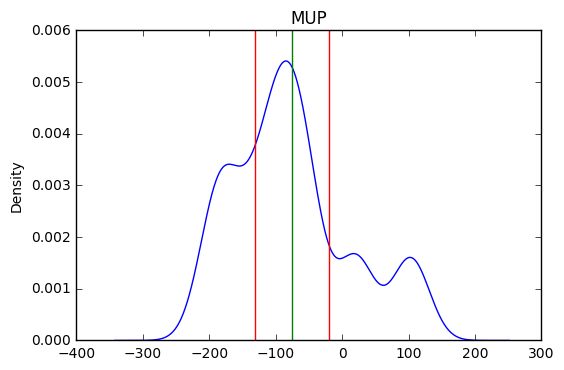

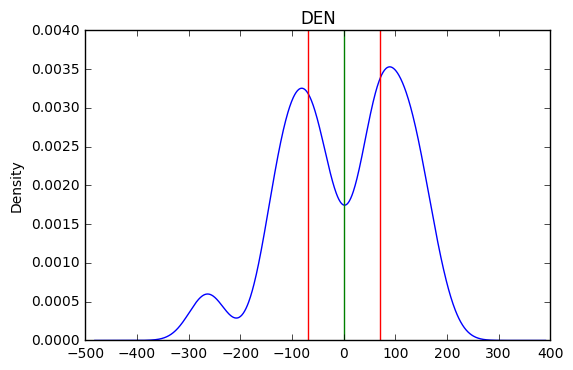

In [106]:
for m in corr_sum_S.strain.unique():
    print m
    plt.figure()
    subDf = corr_sum_S[corr_sum_S.strain == m]
    print subDf.Corr_sum.mean(), subDf.Corr_sum.median(), subDf.Corr_sum.std()
    corr_sum_S[corr_sum_S.strain == m].Corr_sum.plot(kind='density',bw_method=0.3)
    #x = subDf.Corr_sum
    
    l1 = subDf.Corr_sum.mean() + 0.6*subDf.Corr_sum.std()
    l2 = subDf.Corr_sum.mean() - 0.6*subDf.Corr_sum.std()
    print l1, l2
    plt.axvline(x=l1,color='r')
    plt.axvline(x=l2,color='r')
    plt.axvline(x=subDf.Corr_sum.mean(),color='g')
    plt.title(m)

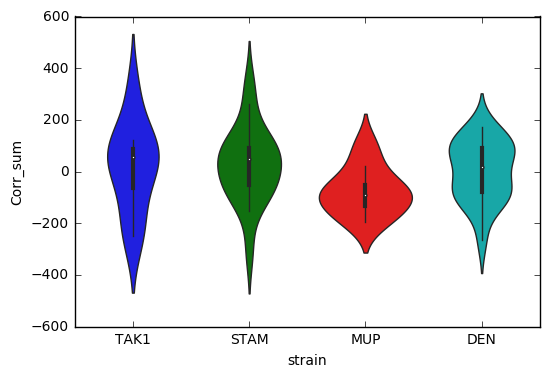

In [113]:
sns.violinplot(data=corr_sum_S, y='Corr_sum',x='strain')

TAK1
18.1158031008 57.3993095675 171.534694952
121.036620072 -84.8050138705
STAM
26.2380453101 46.5391202332 146.129915349
113.915994519 -61.4399038992
MUP
-75.9471895552 -90.8239246193 93.158019169
-20.0523780538 -131.842001057
DEN
1.15576932618 18.351387677 116.999584285
71.3555198973 -69.0439812449


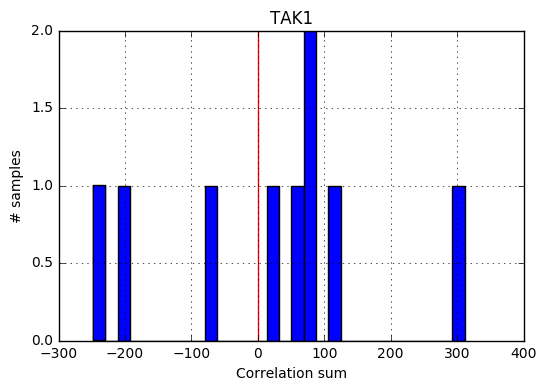

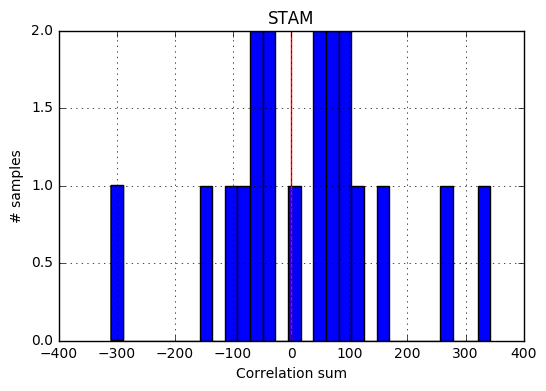

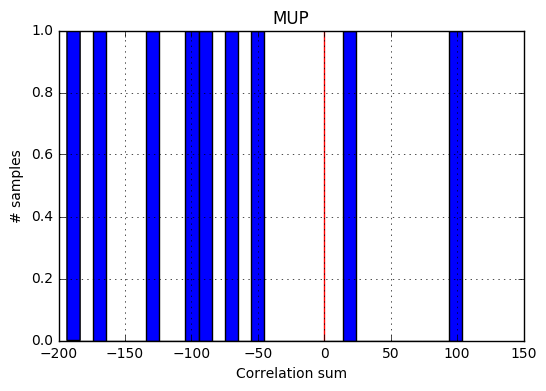

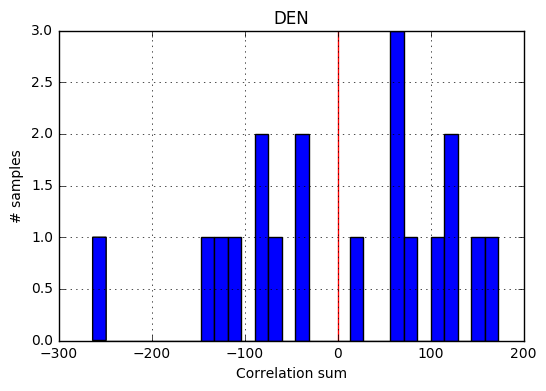

In [116]:
for m in corr_sum_S.strain.unique():
    print m
    plt.figure()
    subDf = corr_sum_S[corr_sum_S.strain == m]
    print subDf.Corr_sum.mean(), subDf.Corr_sum.median(), subDf.Corr_sum.std()
    corr_sum_S[corr_sum_S.strain == m].Corr_sum.hist(bins=30) #.plot(kind='density',bw_method=0.3)
    
    l1 = subDf.Corr_sum.mean() + 0.6*subDf.Corr_sum.std()
    l2 = subDf.Corr_sum.mean() - 0.6*subDf.Corr_sum.std()
    print l1, l2
    plt.axvline(0,color='r')
    plt.xlabel('Correlation sum')
    plt.ylabel('# samples')
    #plt.axvline(x=l2,color='r')
    plt.title(m)

In [17]:
corr_sum_S['condition'] = corr_sum_S.Corr_sum

corr_sum_S.condition[corr_sum_S.Corr_sum < 0] = 'Low'
corr_sum_S.condition[corr_sum_S.Corr_sum > 0] = 'High'

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
corr_sum_S.groupby('strain').condition.value_counts()

strain  condition
DEN     High         10
        Low           9
MUP     Low           7
        High          2
STAM    High         11
        Low           8
TAK1    High          6
        Low           3
Name: condition, dtype: int64

In [19]:
corr_sum_S.to_csv('mouse_corr_conditions.csv',index=False)

In [20]:
corr_sum_S.groupby(['strain']).condition.value_counts()

strain  condition
DEN     High         10
        Low           9
MUP     Low           7
        High          2
STAM    High         11
        Low           8
TAK1    High          6
        Low           3
Name: condition, dtype: int64

### TAK1 condition input can use the correlation con file

## Generate condition files for STAM

In [21]:
joan_mouse['RNA_sname'] = joan_mouse.SAMPLE.map(dnaToRna_dict)

ctnnb1_mut = joan_mouse[joan_mouse.SYMBOL == 'CTNNB1'][['MODEL','RNA_sname','SYMBOL','Driver']]
ctnnb1_mut.columns = ['MODEL','RNA_sname','SYMBOL','condition']
ctnnb1_stams = ctnnb1_mut[ctnnb1_mut.condition == True].RNA_sname.tolist()

stam_all = corr_sum_S[corr_sum_S.strain == 'STAM'][['strain','sample']].drop_duplicates()

stam_all.columns = ['MODEL','RNA_sname']
stam_all['condition'] = 'None'

stam_all.condition[stam_all.RNA_sname.isin(ctnnb1_stams)] = 'Mut'

stam_all.to_csv('mouse_ctnnb1_conditions.csv',index=False)

'''
Self-conditioned. Group1: CTNNB1 mutation+ J757T3; Group2: everything else + J756T4
'''
ctnnb1_stams_2 = ['J750_T1_S1', 'J755_T1_S2', 'J758_T1_S7', 'J759T5_S10', 'J757T3_S6']

stam_all['condition'] = 'None'
stam_all.condition[stam_all.RNA_sname.isin(ctnnb1_stams_2)] = 'Mut'

stam_all.to_csv('mouse_ctnnb1_conditions_2.csv',index=False)

In [22]:
stam_all.shape

(19, 3)

In [27]:
m1 = joan_mouse.MODEL == 'STAM'
m2 = joan_mouse.SYMBOL == 'CTNNB1'
joan_mouse[(m1&m2)]

,MODEL,SAMPLE,SYMBOL,Location,mouse_AA_change,human_Ref,Driver,RNA_sname
51,STAM,J750_T1_S2,CTNNB1,9:120950606-120950606,S33F,S33,True,J750_T1_S1
52,STAM,J750_T1_S2,CTNNB1,9:120950932-120950932,V94I,V94,False,J750_T1_S1
53,STAM,J750_T1_S2,CTNNB1,9:120952927-120952927,NaN,G1370,False,J750_T1_S1
54,STAM,J755_T1_S3,CTNNB1,9:120950606-120950606,S33F,S33,True,J755_T1_S2
55,STAM,J756T1,CTNNB1,9:120958689-120958689,NaN,G1370,False,J756T1_S2
56,STAM,J756T3,CTNNB1,9:120955866-120955866,P526L,P526,False,J756T3_S3
57,STAM,J756T4,CTNNB1,9:120950609-120950609,G34E,G34,True,J756T4_S4
58,STAM,J756T4,CTNNB1,9:120952977-120952977,S352N,S352,False,J756T4_S4
59,STAM,J757_T1_S6,CTNNB1,9:120951122-120951122,T157I,T157,False,J757_T1_S3
60,STAM,J758_T1_S4,CTNNB1,9:120950602-120950602,D32N,D32,True,J758_T1_S7


### Separate STAM mice by the PC plot, also exclude the two outliers that are hard to classify

In [28]:
pc1_group = ['J750_T1_S1', 'J755_T1_S2', 'J758_T1_S7',  'J757T3_S6','J759T5_S10'] 
#J757T3 doesn't have CTNNB1 but is grouped closely

mid_group = ['J759_T1_S9', 'J756T4_S4'] # no CTNNB1 but close, and CTNNB1 but far

pc2_group = ['J750T2_S1', 'J756T1_S2', 'J756T3_S3', 'J756T8_S5',
 'J757_T1_S3', 'J757_T3_S4', 'J757_T6_S5', 'J757_T7_S6',
 'J758T3_S7', 'J758_T4_S8', 'J759T2_S8', 'J759T4_S9']

In [39]:
print ', '.join(pc2_group)

J750T2_S1, J756T1_S2, J756T3_S3, J756T8_S5, J757_T1_S3, J757_T3_S4, J757_T6_S5, J757_T7_S6, J758T3_S7, J758_T4_S8, J759T2_S8, J759T4_S9


In [30]:
len(pc1_group), len(mid_group), len(pc2_group)

(5, 2, 12)

In [32]:
stam_all['condition'] = 'None'
stam_all.condition[stam_all.RNA_sname.isin(pc1_group)] = 'PC1'

In [33]:
stam_sub = stam_all[~stam_all.RNA_sname.isin(mid_group)]

In [34]:
stam_sub.RNA_sname.nunique()

17

In [36]:
stam_sub.to_csv('mouse_ctnnb1_conditions_PCs.csv',index=False)

In [40]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


### scratch

## Check expressions

In [48]:
mouse = pd.read_csv('../corr_exp_mouse.csv',skiprows=1)

In [64]:
mouse = mouse.iloc[1:,:]

In [55]:
corr_sum_S.columns = [u'strain', u'Sample', u'Corr_sum', u'condition']

In [72]:
m1 = corr_sum_S.strain == 'DEN'
m2 = corr_sum_S.condition == 'High'
m3 = corr_sum_S.condition == 'Low'
corr_sum_S[(m1&m2)]

,strain,Sample,Corr_sum,condition
45,DEN,T62_S15,18.351388,High
46,DEN,T20_S13,68.550892,High
47,DEN,T32_S15,67.856208,High
49,DEN,T79_S16,60.534903,High
50,DEN,T7_S11,172.775217,High
51,DEN,T89_S18,108.356454,High
52,DEN,T19_S12,120.124593,High
53,DEN,T58_S13,73.021340,High
54,DEN,T67_S16,143.719520,High
55,DEN,T92_S19,125.698137,High


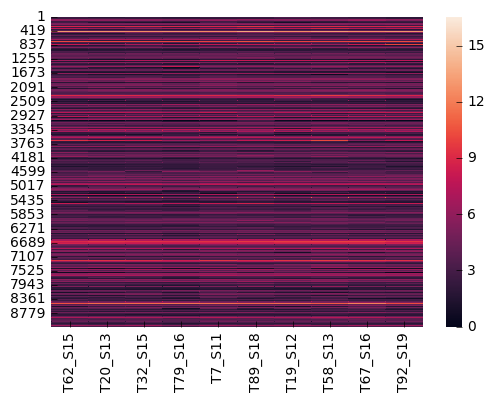

In [70]:
import seaborn as sns
sns.heatmap(mouse[corr_sum_S[(m1&m2)].Sample])

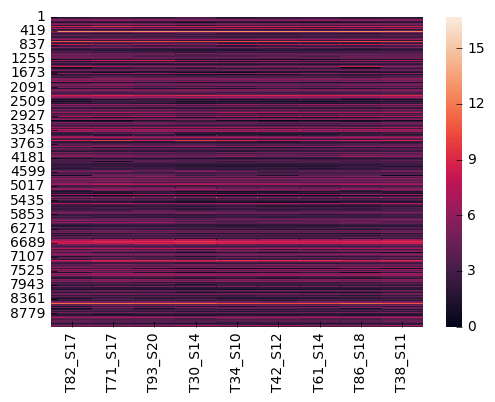

In [73]:
sns.heatmap(mouse[corr_sum_S[(m1&m3)].Sample])

In [103]:
con_cdict = {'High':'r','Low':'b'}

In [88]:
mouse[corr_sum_S[(m1)].Sample].shape

(9175, 19)

In [91]:
old_den = ['T34','T38','T42','T58', 'T61', 'T62','T79', 'T82', 'T86']

In [94]:
sName_match['Batch'] = 'New'
sName_match.Batch[sName_match.DNA_sName.isin(old_den)] = 'Old'

In [98]:
old_den_rna = sName_match.RNA_sName[sName_match.Batch == 'Old'].tolist()

In [123]:
batch_cdict = {False:'y',True:'g'} #True = old
corr_sum_S['Batch'] = corr_sum_S.Sample.isin(old_den_rna)

In [118]:
sname_to_con = corr_sum_S.set_index(['Sample'])['condition'].to_dict()
sname_to_batch = corr_sum_S.set_index(['Sample'])['Batch'].to_dict()

In [119]:
den_exp = mouse[corr_sum_S[(m1)].Sample]

In [124]:
corr_colors = pd.Series(den_exp.columns).map(sname_to_con).map(con_cdict).tolist()
batch_colors = pd.Series(den_exp.columns).map(sname_to_batch).map(batch_cdict).tolist()

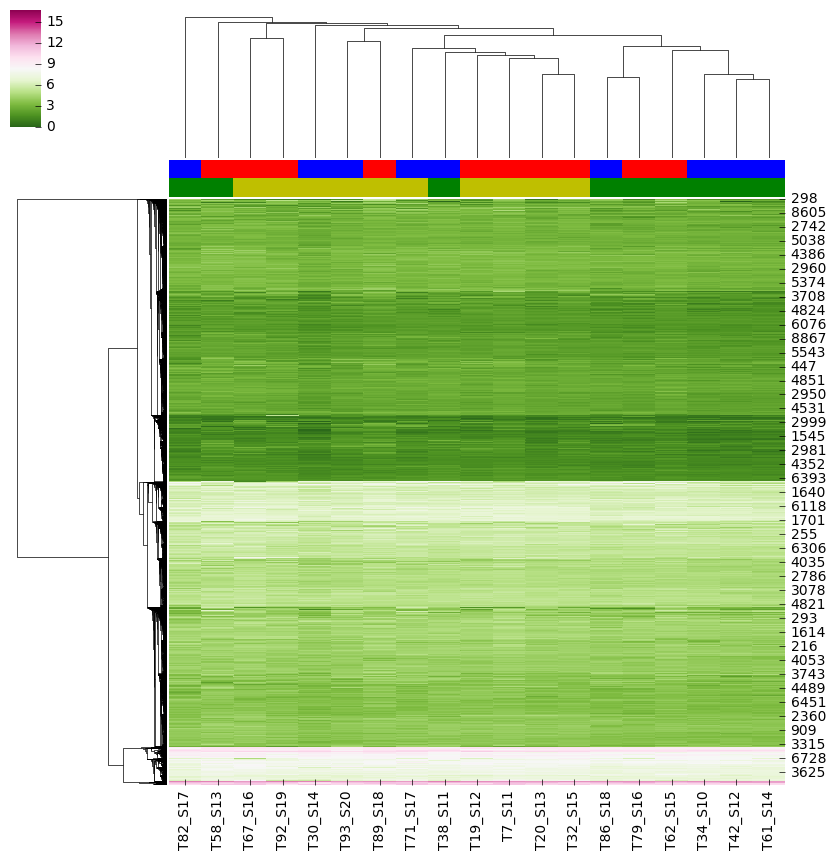

In [141]:
import seaborn as sns
sns.clustermap(den_exp,col_colors=[corr_colors]+[batch_colors],cmap='PiYG_r')